In [1]:
import os
import sys

# Sätt base_dir (projektets rotkatalog)
base_dir = os.path.abspath("..")  
sys.path.append(base_dir) 

from src.evaluation import test_optimizer, visualize_results, analyze_best_solution
from src.optimizer import Optimizer
from src.data_processing import load_data

# Ladda paketdata
lagerstatus = os.path.join(base_dir, "data", "lagerstatus1.csv")

packages = load_data(lagerstatus)

# Rensa loggar
log_dir = os.path.join(base_dir, "logs")
if os.path.exists(log_dir):
    for file in os.listdir(log_dir):
        file_path = os.path.join(log_dir, file)
        if os.path.isfile(file_path):
            os.unlink(file_path)

# Lägg tillbaka loggfilerna efter att ha tagit bort dem
with open(os.path.join(log_dir, 'optimization.log'), 'w') as f:
    f.write('Log file created after cleanup.\n')

log_file = os.path.join(log_dir, 'optimization.log')


In [2]:
# Definiera olika testfall
test_cases = [
    {"population_size": 20, "generations": 50},
    {"population_size": 20, "generations": 100},
    {"population_size": 20, "generations": 150},
    {"population_size": 40, "generations": 50},
    {"population_size": 40, "generations": 100},
    {"population_size": 40, "generations": 150},
    {"population_size": 80, "generations": 50},
    {"population_size": 80, "generations": 100},
    {"population_size": 80, "generations": 150},
    {"population_size": 100, "generations": 50},
    {"population_size": 100, "generations": 150},
    {"population_size": 100, "generations": 200},
]


In [3]:
# Kör optimeringstester
results = test_optimizer(packages, test_cases)
results


,population_size,generations,patience,best_fitness,mean_fitness,num_generations
0,20,50,5,18384.1,15013.35500,50
1,20,100,5,18309.1,14978.17500,100
2,20,150,5,18364.1,15000.16000,150
3,40,50,5,19746.1,15698.17500,50
4,40,100,5,19158.1,15229.72500,100
5,40,150,5,20008.1,15692.39750,150
6,80,50,5,20436.1,16664.07375,50
7,80,100,5,21206.1,16759.61125,100
8,80,150,5,21232.1,16669.33750,150
9,100,50,5,20734.1,16846.81800,50


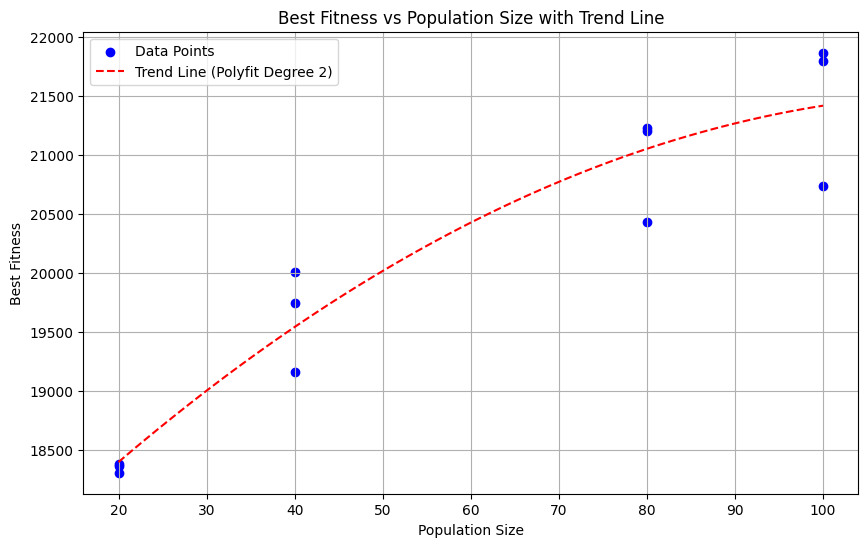

In [4]:
visualize_results(results)

In [5]:
# Initiera optimizer för den bästa parameteruppsättningen
best_case = test_cases[results["best_fitness"].idxmax()]
optimizer = Optimizer(packages, max_trucks=10, max_capacity=800, log_file=)
stats, best_solution = optimizer.optimize(
    population_size=best_case["population_size"],
    generations=best_case["generations"],
)

In [6]:
optimizer.display_results()


--- Resultat för Optimering ---
Truck(Truck_1, Total Weight: 800.00, Packages: 264, Total Profit: 1359.00)
Truck(Truck_2, Total Weight: 800.00, Packages: 246, Total Profit: 1159.00)
Truck(Truck_3, Total Weight: 799.90, Packages: 235, Total Profit: 1137.00)
Truck(Truck_4, Total Weight: 799.90, Packages: 255, Total Profit: 1204.00)
Truck(Truck_5, Total Weight: 799.80, Packages: 229, Total Profit: 1066.00)
Truck(Truck_6, Total Weight: 799.90, Packages: 224, Total Profit: 1083.00)
Truck(Truck_7, Total Weight: 799.80, Packages: 227, Total Profit: 1005.00)
Truck(Truck_8, Total Weight: 799.80, Packages: 223, Total Profit: 945.00)
Truck(Truck_9, Total Weight: 799.90, Packages: 186, Total Profit: 894.00)
Truck(Truck_10, Total Weight: 800.00, Packages: 196, Total Profit: 972.00)

Totalt antal paket kvar i lager: 7715
Total Förtjänst (levererade paket): 10824.0
Totala Straffavgifter: -769.0
Actual total profit: 10055.0


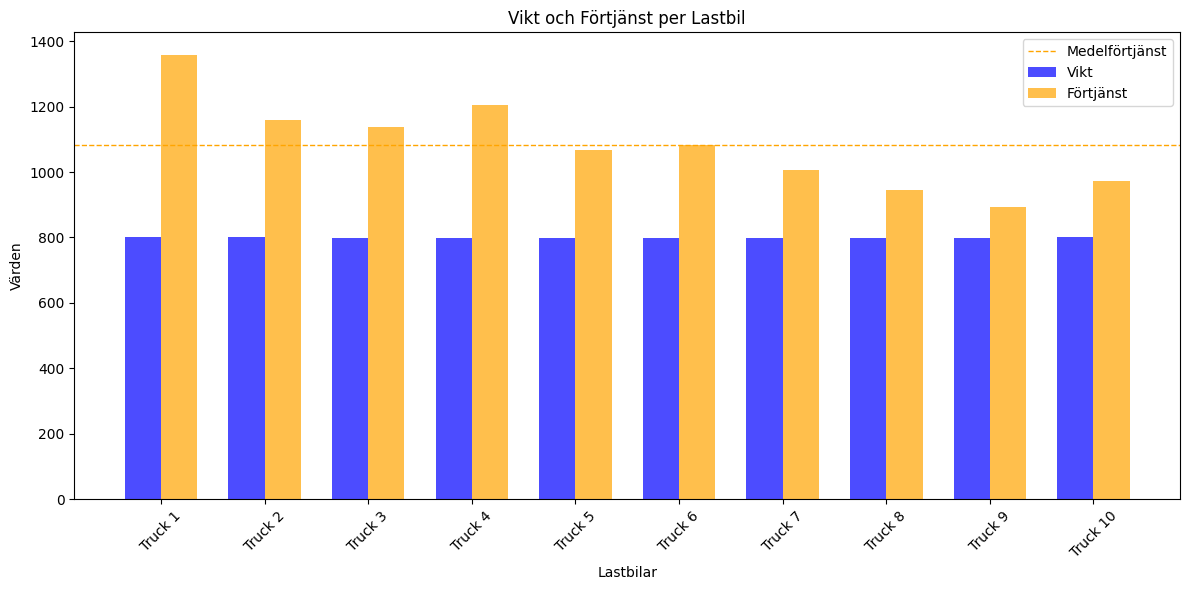

--- Statistik för Lastbilar ---
Medelvikt: 799.90, Varians: 0.01, Std Avvikelse: 0.08
Medelförtjänst: 1082.40, Varians: 17296.44, Std Avvikelse: 131.52


In [8]:
optimizer.analyze_solution()

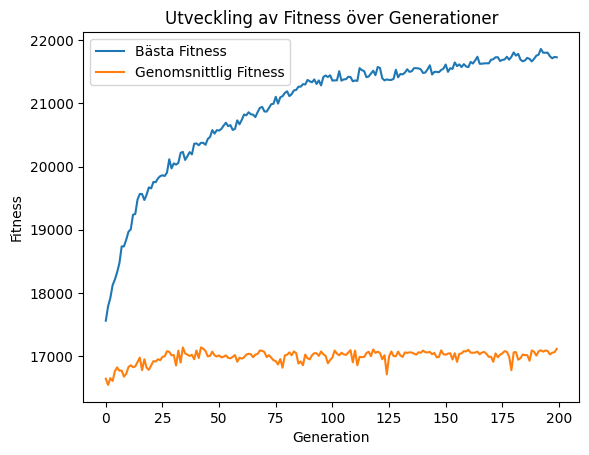

In [11]:
from src.visualization import visualize_fitness

visualize_fitness(stats)

Efter optimering verkar dessa inställningar vara konkret bäst. Finns antagligen förbättringar men tidsspannet att ladda är för stort på nuvarande maskin.

* Population: 100
* Generationer: 200